<a href="https://colab.research.google.com/github/Nishant141/Customer-Churn-Prediction-/blob/main/Spotify_Million_Song_Dataset_NG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build a Music Recommendation App using Python. Do not download data offline. Use the Kaggle API to fetch the data directly from the Kaggle platform. The dataset to be used is "https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset". Explain any errors encountered and fix them if possible.

In [ ]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", palette="pastel")

df = pd.read_csv('/content/spotify_millsongdata.csv')
print("Rows × Columns:", df.shape)
df.head()

Rows × Columns: (57650, 4)


,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


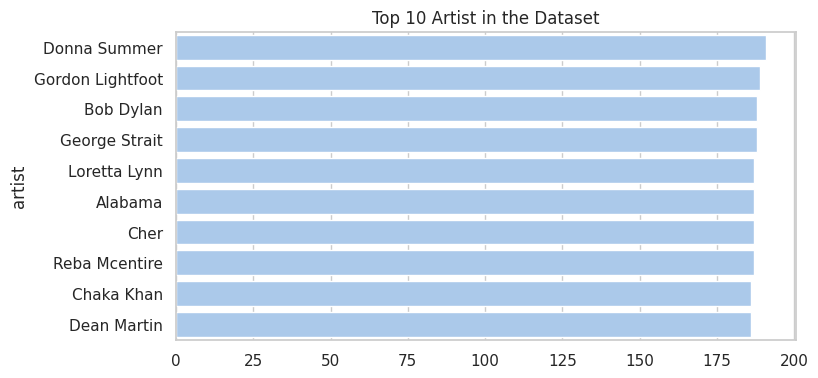

In [ ]:


top10 = df['artist'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top10.values, y=top10.index, orient='h')
plt.title("Top 10 Artist in the Dataset")
plt.show()

In [ ]:
# Keep only non-empty lyrics
clean = df[['song', 'artist', 'text']].dropna().reset_index(drop=True)

# Optional: sample for speed on free Kaggle GPUs
#clean = clean.sample(100_000, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english', max_features=30_000)
tfidf_matrix = tfidf.fit_transform(clean['text'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_recommendations(song_title, top_n=5):
    """
    Return top-N similar songs based on lyric similarity.
    """
    # Case-insensitive search
    mask = clean['song'].str.lower().str.contains(song_title.lower(), na=False)
    hits = clean[mask]

    if hits.empty:
        return f"❌ Song '{song_title}' not found. Try another title."

    # Find the index of the first match
    idx = hits.index[0]
    song_name, artist_name = hits.iloc[0][['song', 'artist']]

    # Compute similarities
    sims = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()

    # Get the indices of the top-N similar songs (excluding the song itself)
    top_idx = sims.argsort()[-top_n-1:-1][::-1]

    # Retrieve the recommended songs and their similarity scores
    recs = clean.iloc[top_idx][['song', 'artist']].copy()
    recs['similarity'] = sims[top_idx].round(4)

    return recs

In [ ]:
recommend("Bad Guy", top_n=7)

,song,artist,similarity
29779,I Want A Guy,Diana Ross,0.3399
4796,He's My Guy,Ella Fitzgerald,0.3293
27741,What I'm Looking For,Christina Aguilera,0.2967
33064,This Guy's In Love With You,Frankie Valli,0.2938
41935,I'm That Type Of Guy,LL Cool J,0.2928
20902,I'm Bad,Violent Femmes,0.2838
9995,All Bad,Justin Bieber,0.2796


In [ ]:
# Interactive widget in Kaggle
import ipywidgets as widgets
from IPython.display import display, HTML
import pandas as pd

song_box  = widgets.Text(value="Bad Guy", description="Song:")
n_slider  = widgets.IntSlider(value=5, min=1, max=10, description="Top-N:")
out       = widgets.Output()

def on_click(btn):
    with out:
        out.clear_output()
        recommendations = get_recommendations(song_box.value, n_slider.value)
        if isinstance(recommendations, str): # Handle the case where the song is not found
            print(recommendations)
        else:
            display(recommendations)

btn = widgets.Button(description="Recommend")
btn.on_click(on_click)

display(widgets.HBox([song_box, n_slider]), btn, out)

Button(description='Recommend', style=ButtonStyle())

Output()